In [1]:
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import db_info

# Análise Exploratória de Dados (EDA) da tabelas.

### Faço uma análise de cada tabela para entender melhor como são constituídas e se algum campo precisa de tratamento.

## Análise da Tabela de Notas Fiscais

In [2]:
db_connection = sql.connect(host=db_info.HOST, database=db_info.DATABASE, user=db_info.USER, password=db_info.PASS)
notas = pd.read_sql("SELECT * FROM notas_fiscais", con=db_connection)
db_connection.close()

In [3]:
notas.head()

,id_nota,numero_nota,id_pedido,id_vendedor,valor_venda,frete,imposto
0,1,100,1,4,51900.0,5190.0,78.0
1,2,101,2,6,62100.0,6210.0,93.0
2,3,102,3,2,39000.0,3900.0,59.0
3,4,103,4,6,13000.0,1300.0,20.0
4,5,104,5,6,36400.0,3640.0,55.0


## Vejo que não há valores faltantes na tabela

In [4]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139999 entries, 0 to 139998
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id_nota      139999 non-null  int64  
 1   numero_nota  139999 non-null  int64  
 2   id_pedido    139999 non-null  int64  
 3   id_vendedor  139999 non-null  int64  
 4   valor_venda  139999 non-null  float64
 5   frete        139999 non-null  float64
 6   imposto      139999 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 7.5 MB


## Olhando o resumo dos campos, o 'valor_venda' chama a atenção.

O campo apresenta venda com o valor 1, não parece estar correto.

In [5]:
notas[['valor_venda','frete','imposto']].describe()

,valor_venda,frete,imposto
count,139999.000000,139999.000000,139999.000000
mean,36592.058884,6748.608276,101.295145
std,30181.342552,4518.237109,67.793228
min,1.000000,520.000000,8.000000
25%,8200.000000,3240.000000,49.000000
50%,34200.000000,5750.000000,86.000000
75%,59500.000000,9520.000000,143.000000
max,99000.000000,19800.000000,297.000000


## Olando a distribuição dos campos vemos vendas com o valor próximo ao 0.

O valor mínimo do frete está maior que o valor mínimo da venda.

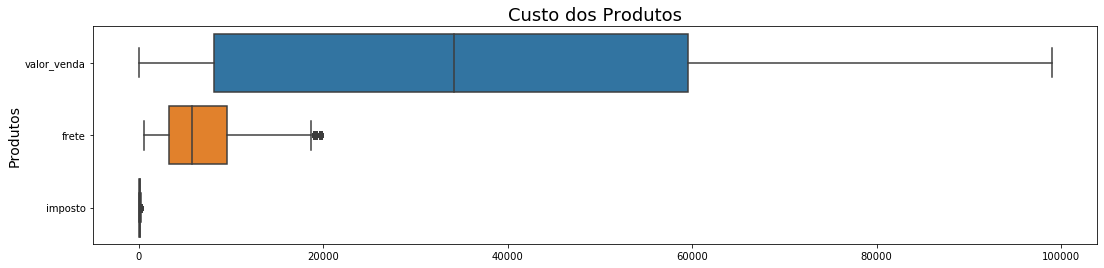

In [6]:
ax = sns.boxplot(data = notas[['valor_venda','frete','imposto']], orient = 'h')
ax.figure.set_size_inches(18, 4)
ax.set_title("Custo dos Produtos", fontsize = 18)
ax.set_ylabel("Produtos", fontsize = 14)
plt.show()

## Olhando o gráfico de distribuição do 'valor_venda' com o 'frete' duas coisas chamam a atenção:

### O frete forma uma reta perfeita com o valor da venda, o que indica uma correlação perfeita. O valor do frete deve ser uma porcentagem fixa do valor da venda.

### Existem muitas notas com o valor da venda extremamente baixo, próximo ao 0, mas com o frete alto.

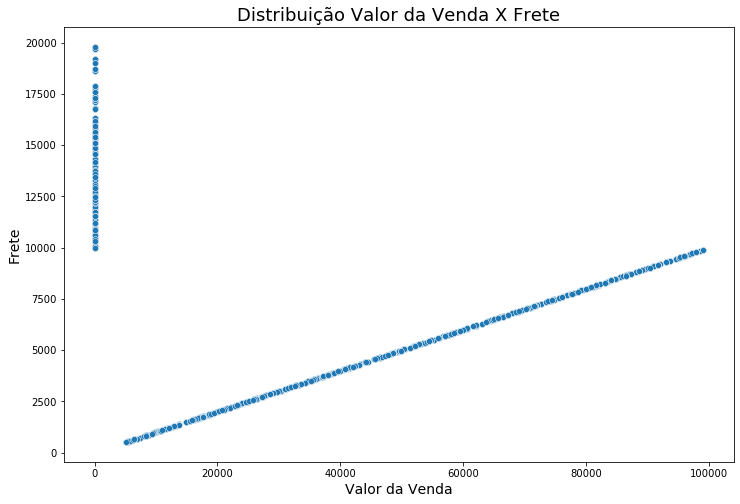

In [7]:
ax = sns.scatterplot(data = notas, x = 'valor_venda', y = 'frete')
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição Valor da Venda X Frete", fontsize = 18)
ax.set_ylabel("Frete", fontsize = 14)
ax.set_xlabel("Valor da Venda", fontsize = 14)
plt.show()

## Olhando a tabela de Produtos, o mais barato custa 5200.

### Filtrei os dados pelo valor da venda menor do que 5200.

In [8]:
notas_incorretas = notas[notas['valor_venda'] < 5200][['valor_venda','frete','imposto']]
notas_incorretas

,valor_venda,frete,imposto
7,1.074,10740.0,161.0
11,1.710,17100.0,257.0
14,1.211,12110.0,182.0
16,1.240,12400.0,186.0
19,1.360,13600.0,204.0
...,...,...,...
139983,1.344,13440.0,202.0
139985,1.032,10320.0,155.0
139988,1.290,12900.0,194.0
139993,1.730,17300.0,260.0


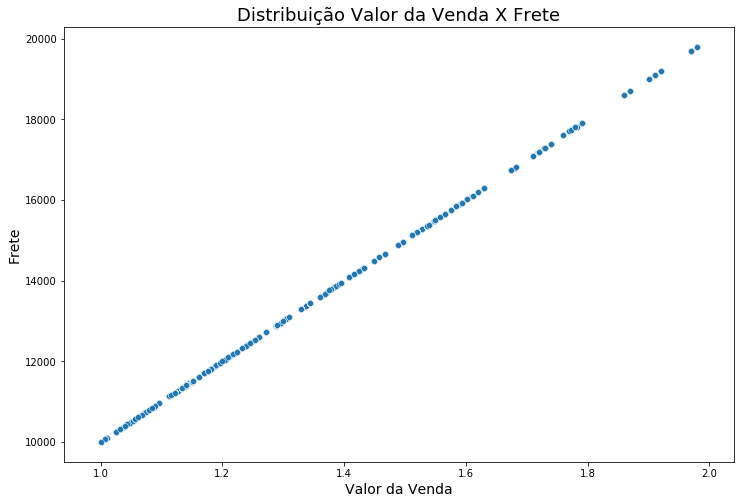

In [9]:
ax = sns.scatterplot(data = notas_incorretas, x = 'valor_venda', y = 'frete')
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição Valor da Venda X Frete", fontsize = 18)
ax.set_ylabel("Frete", fontsize = 14)
ax.set_xlabel("Valor da Venda", fontsize = 14)
plt.show()

## Olhando os campos agora eles apresentam a mesma relação dos dados corretos.

Acredito que ouve algum erro ao se registrar o valor da venda.

Olhando os dados corretos o frete aparenta ser 10% do valor da venda. Com base nisso posso usar o valor do frete para calcular o valor da venda.

In [10]:
notas.loc[notas['valor_venda'] < 5200, 'valor_venda'] = notas[notas['valor_venda'] < 5200]['frete'] * 10

## Após realizar esse processo os dados aparentam estão homogêneos.

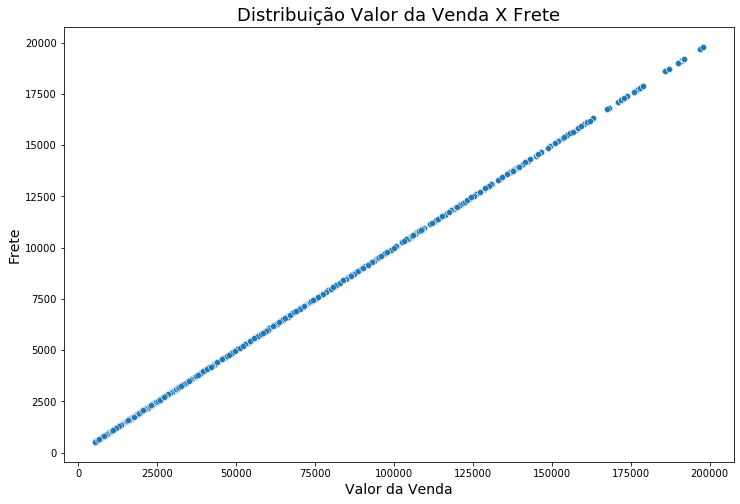

In [11]:
ax = sns.scatterplot(data = notas, x = 'valor_venda', y = 'frete')
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição Valor da Venda X Frete", fontsize = 18)
ax.set_ylabel("Frete", fontsize = 14)
ax.set_xlabel("Valor da Venda", fontsize = 14)
plt.show()

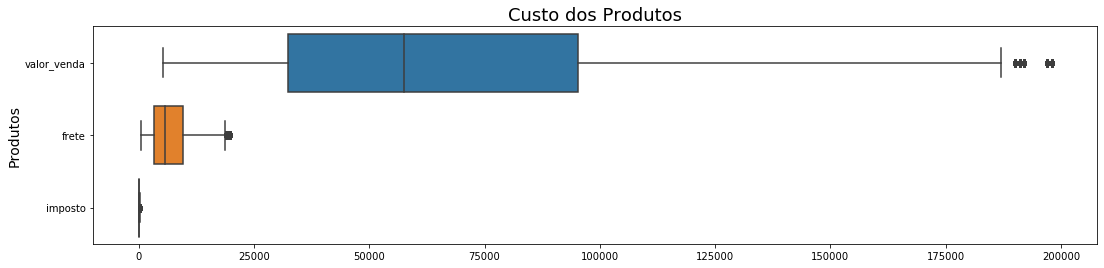

In [12]:
ax = sns.boxplot(data = notas[['valor_venda','frete','imposto']], orient = 'h')
ax.figure.set_size_inches(18, 4)
ax.set_title("Custo dos Produtos", fontsize = 18)
ax.set_ylabel("Produtos", fontsize = 14)
plt.show()

Não irei gravar as correções realizadas aqui. Todas as correções serão feitas no Power BI.

O objetivo dos notebooks de EDA é somente entender o comportamento dos dados e encontrar possíveis problemas.